## Feature Importance and Feature Selection With XGBoost in Python



A benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

Now lets discover how you can estimate the importance of features for a predictive modeling problem using the XGBoost library in Python.





### Feature Importance in Gradient Boosting

A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.


Ensemble learning

So what is XGBoost and where does it fit in the world of ML? Gradient Boosting Machines fit into a category of ML called Ensemble Learning, which is a branch of ML methods that train and predict with many models at once to produce a single superior output. Think of it as planning out a few different routes to a single location you’ve never been to; as you use all of the routes, you begin to learn which traffic lights take long when and how the time of day impacts one route over the other, allowing you to craft the perfect route. You experimented with and combined a few different models to reach an optimal conclusion. Ensemble learning is similar!

Ensemble learning is broken up into three primary subsets:

Bagging: Bootstrap Aggregation or Bagging has two distinct features which define its training and prediction. For training, it leverages a Bootstrap procedure to separate the training data into different random subsamples, which different iterations of the model used to train on. For prediction, a bagging classifier will use the prediction with the most votes from each model to produce its output and a bagging regression will take an average of all models to produce an output. Bagging is typically applied to high variance models such as Decision Trees and the Random Forest algorithm is a very close variation on bagging.
Stacking: A Stacking model is a “meta-model” which leverages the outputs from a collection of many, typically significantly different, models as input features. For instance, this allows you to train a K-NN, Linear Regression, and Decision Tree with all of your training data, then take those outputs and merge them with a Logistical Regression. The idea is that this can reduce overfitting and improve accuracy.
Boosting: Finally boosting! The core definition of boosting is a method that converts weak learners to strong learners and is typically applied to trees. More explicitly, a boosting algorithm adds iterations of the model sequentially, adjusting the weights of the weak-learners along the way. This reduces bias from the model and typically improves accuracy. Popular boosting algos are AdaBoost, Gradient Tree Boosting, and XGBoost, which we’ll focus on here.


eXtreme Gradient Boosting or XGBoost is a library of gradient boosting algorithms optimized for modern data science problems and tools. It leverages the techniques mentioned with boosting and comes wrapped in an easy to use library. Some of the major benefits of XGBoost are that its highly scalable/parallelizable, quick to execute, and typically outperforms other algorithms.

enough pep talk lets get into the coding part

In [9]:
#import the titanic data into a dataframe 

import pandas as pd
base_train_df = pd.read_csv('train.csv')

#reviewed data and select only continuous features
train_df = base_train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']]
train_df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [10]:
#Split data into training features and labels
X, y = train_df.loc[:, train_df.columns != 'Survived'], train_df['Survived']

from sklearn.model_selection import train_test_split
# split data into train and test sets
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.44%


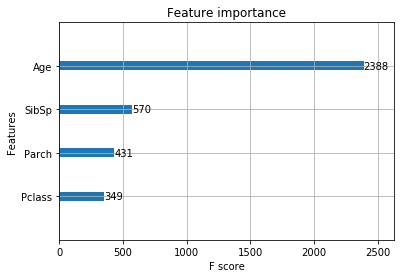

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.show()